In [1]:
#applying textblob

In [2]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/roop/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#importing textblob
from textblob import TextBlob

In [5]:
sentence_df=pd.read_csv("sentence_df.csv")

In [6]:
n=sentence_df.shape[0]
sentence_df['predicted_sentiment']=0
for i in range(n):
    pol=TextBlob(unicode(sentence_df.ix[i,'Sentence'],'utf-8')).sentiment.polarity
    if pol>0:
        sentence_df.ix[i,'predicted_sentiment']=1
    if pol==0:
        sentence_df.ix[i,'predicted_sentiment']=0 
    if pol<0:
        sentence_df.ix[i,'predicted_sentiment']=-1
        

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [7]:
sentence_df['predicted_sentiment'].value_counts()

 1    1461
 0     836
-1     703
Name: predicted_sentiment, dtype: int64

In [8]:
sentence_df.dtypes

Sentence               object
sentiment               int64
source                 object
predicted_sentiment     int64
dtype: object

In [9]:
sentence_df['predicted_sentiment']=sentence_df['predicted_sentiment'].astype('category')

In [10]:
sentence_df['sentiment'].value_counts()

1    1500
0    1500
Name: sentiment, dtype: int64

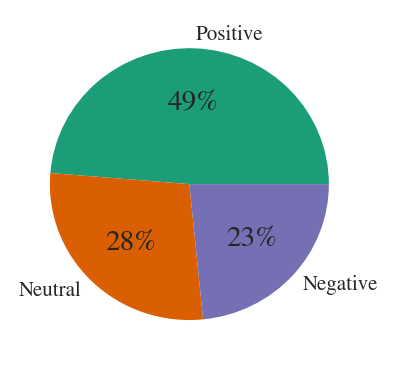

In [11]:
plt.figure(figsize=(3,3))
plt.pie(sentence_df['predicted_sentiment'].value_counts(),labels=['Positive','Neutral','Negative'],autopct='%1.0f%%')
plt.show()